In [100]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from numba import njit
from src.game import discrete_geometry as dg

## Matplotlib stuff

In [102]:
def mk_rectangles(ax, xy_list, alpha=0.1):
    for xy in xy_list:
        rect = patches.Rectangle(xy, 1, 1, facecolor='k', alpha=alpha)
        ax.add_patch(rect)

def mk_grid(xy_list, alpha=0.1):
    fig, ax = plt.subplots()
    mk_rectangles(ax, xy_list, alpha)
    plt.xlim([0, 80])
    plt.ylim([0, 60])
    ax.set_xticks(np.linspace(0,80,81))
    ax.set_yticks(np.linspace(0,60,61))
    plt.grid()
    plt.show()

## Utils

In [103]:
def mk_all_edge_xy(dims):
    xy_list = []
    for x in range(dims[0]):
        for y in range(dims[1]):
            if x == 0 or x == dims[0]-1 or y == 0 or y == dims[1]-1:
                xy = [x, y]
                xy_list.append(xy)
    return np.array(xy_list)


In [104]:
def times_per_sec(func, *args, **kwargs):
    iters = 1000
    t0 = time.time()
    for _ in range(iters):
        func(*args, **kwargs)
    t1 = time.time()
    print(iters/(t1-t0))

## Geometry

## Experiments

In [105]:
dims = (80, 60)
xy = [40, 30]
density = 360
dm = dims
radial = dg.bresenham_radial(dm) + xy

In [106]:
# radius = np.sqrt(dm[0]**2 + dm[1]**2).astype('i8')
# XY_CIRC = np.array(discrete_lines.bresenham_circle(radius)) + xy
# mk_grid(XY_CIRC)

In [107]:
# XY_LIST = radial.reshape(-1, len(xy))
# mk_grid(XY_LIST)

# Chunks of Grid

In [108]:
def box_index(max_x, max_y, xy_shift):
    box = np.zeros((max_x * 2 + max_y * 2 - 4, 2), dtype='i8')
    i = 0
    for x in range(max_x):
        for y in range(max_y):
            if (x == 0) or (x == max_x-1) or (y==0) or (y == max_y-1):
                box[i] = [x, y]
                i += 1
    return box + xy_shift


In [109]:
xy_shift = np.array([30, 30])
XY_LIST = dg.bresenham_circle_tweaked(1)
# for r in range(2, 30):
    # XY_LIST = np.concatenate((XY_LIST, dg.bresenham_circle_tweaked(r)))
XY_LIST += xy_shift

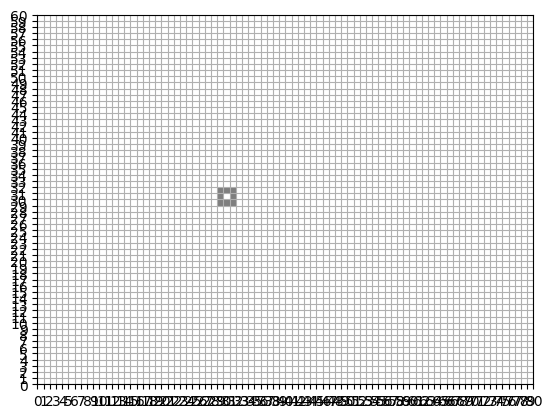

In [110]:

# XY_LIST = box_index(10, 4, xy_shift)
mk_grid(XY_LIST, 0.5)